### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

#visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol dal più alto
top10_paesi = df.sort_values("total_litres_of_pure_alcohol", ascending=False).head(10)
#mostra solo la colonna con il nome e i litri di alcohol
top10_paesi[["country", "total_litres_of_pure_alcohol"]]


,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
61,France,11.8
45,Czech Republic,11.8
141,Russian Federation,11.5
99,Luxembourg,11.4
155,Slovakia,11.4
81,Ireland,11.4


In [15]:
#media consumo di birra, vino e distillati
media_consumi = df[["beer_servings", "wine_servings", "spirit_servings"]].mean()
media_consumi

beer_servings      106.160622
wine_servings       49.450777
spirit_servings     80.994819
dtype: float64

In [17]:
#crea una colonna alcohol_index che sia un indice medio di consumo dei 3 alcolici
df["alcohol_index"] = ( 
    df["beer_servings"] + 
    df["wine_servings"] + 
    df["spirit_servings"]
    )/3
#visualizzo il dataframe con la colonna in più
df[["country", "alcohol_index"]].head()

,country,alcohol_index
0,Afghanistan,0.000000
1,Albania,91.666667
2,Algeria,13.000000
3,Andorra,231.666667
4,Angola,106.333333


In [ ]:
#trovare il paese con il massimo alcohol_index
max_index = df["alcohol_index"].idxmax()
#accede al valore di una colonna specifica in quella riga
paese_max = df.loc[max_index, "country"]
valore_max = df.loc[max_index, "alcohol_index"]
print(paese_max, valore_max)


Andorra 231.66666666666666


In [22]:
#paesi che consumano più di 100 birre all'anno
paesi_molta_birra = df[df["beer_servings"] > 100]
paesi_molta_birra[["country", "beer_servings"]]

,country,beer_servings
3,Andorra,245
4,Angola,217
5,Antigua & Barbuda,102
6,Argentina,193
8,Australia,261
...,...,...
182,United Kingdom,219
184,USA,249
185,Uruguay,115
188,Venezuela,333


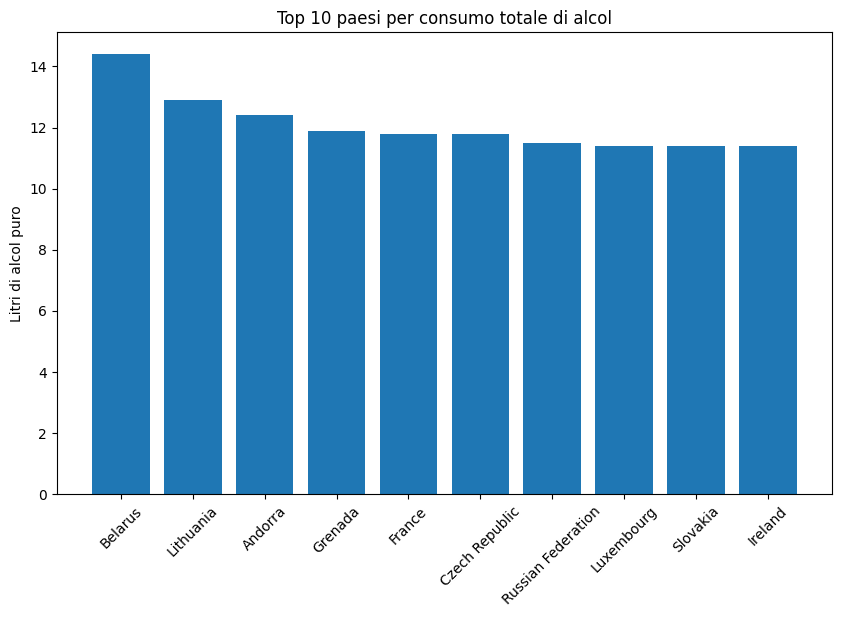

In [24]:
#barchart dei 10 paesi con più consumo totale
top10_total = df.sort_values(by="total_litres_of_pure_alcohol", ascending = False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_total['country'], top10_total['total_litres_of_pure_alcohol'])
plt.xticks(rotation=45)
plt.ylabel('Litri di alcol puro')
plt.title('Top 10 paesi per consumo totale di alcol')
plt.show()


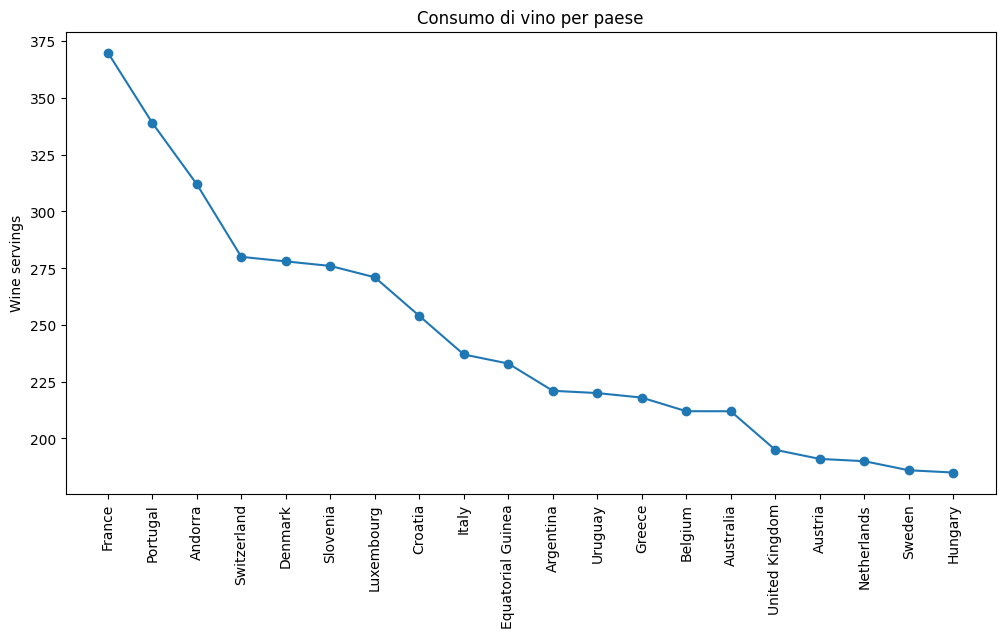

In [27]:
#line plot di wine_servings ordinato per paese

#ordino il dataframe per i bicchieri di vino serviti
#poichè ci sono troppi valori inserisco solo i 20 paesi con consumo più alto
df_wine_sorted = df.sort_values(by='wine_servings', ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.plot(df_wine_sorted['country'], df_wine_sorted['wine_servings'], marker='o')
plt.xticks(rotation=90)
plt.ylabel('Wine servings')
plt.title('Consumo di vino per paese')
plt.show()


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [10]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#per capire i nomi delle colonne del dataframe
print(df.columns)

agg_country = df.groupby(['job_country', 'job_title_short']).agg(
    salary_year_avg=('salary_year_avg', 'mean'),
    job_count=('job_title_short', 'count'),
    salary_year_min=('salary_year_avg', 'min'),
    salary_year_max=('salary_year_avg', 'max')
).reset_index()
#reset_index() perchè dopo il groupby mi servono le variabili come colonne

agg_country.head(20)


Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')


,job_country,job_title_short,salary_year_avg,job_count,salary_year_min,salary_year_max
0,Afghanistan,Business Analyst,NaN,4,NaN,NaN
1,Afghanistan,Data Analyst,NaN,9,NaN,NaN
2,Afghanistan,Data Scientist,NaN,1,NaN,NaN
3,Afghanistan,Senior Data Analyst,NaN,2,NaN,NaN
4,Albania,Business Analyst,NaN,11,NaN,NaN
5,Albania,Cloud Engineer,NaN,1,NaN,NaN
6,Albania,Data Analyst,49950.00,36,43200.0,56700.0
7,Albania,Data Engineer,NaN,30,NaN,NaN
8,Albania,Data Scientist,69981.25,12,69962.5,70000.0
9,Albania,Machine Learning Engineer,NaN,4,NaN,NaN


In [ ]:
#grafico a barre orizzontali dello stipendio medio (ordine decrescente) per i diversi ruoli



